In [1]:
# In this notebook, we evaluate the quality of the Hbmass synthetic data generated with 'synthpop' in R using the SyntheticDataEvaluator class.

In [2]:
import pandas as pd
import pprint

from sdv.datasets.local import load_csvs
from sdv.metadata import SingleTableMetadata

import plotly.graph_objects as go

from synthetic_data_evaluator import SyntheticDataEvaluator

In [3]:
# Set option to display all rows
pd.set_option('display.max_rows', None)

# Load data

In [4]:
data = load_csvs(folder_name='Hbmass_csvs')
data.keys()

dict_keys(['Parvo_raw', 'Hbmass_raw', 'Hbmass_raw_mice_R_imputed', 'Hbmass_synthetic_synthpop'])

### Original data

In [5]:
Hbmass = data['Hbmass_raw_mice_R_imputed']
Hbmass.head(5)

,ID,TIME,SEX,SUP_DOSE,BM,FER,FE,TSAT,TRANS,AHBM,RHBM
0,1,0,1,0,77.1,160.9,22.1,36.0,2.7,1005,13.0
1,2,0,1,0,65.4,168.7,15.3,25.0,2.7,876,13.4
2,3,0,0,0,53.0,227.8,17.5,31.0,2.5,782,14.8
3,4,0,1,0,63.5,202.0,14.4,22.0,2.9,909,14.3
4,5,0,1,0,60.2,175.8,25.3,36.0,2.6,744,12.4


In [6]:
# Create a new ID column running from 1 to 356 - this is needed for the correct metadata autodetection - the ID column has to be continuous
Hbmass['ID'] = range(1, len(Hbmass) + 1)

### Hbmass 'synthpop' synthetic data

In [7]:
Hbmass_synthetic = data['Hbmass_synthetic_synthpop']
Hbmass.head(5)

,ID,TIME,SEX,SUP_DOSE,BM,FER,FE,TSAT,TRANS,AHBM,RHBM
0,1,0,1,0,77.1,160.9,22.1,36.0,2.7,1005,13.0
1,2,0,1,0,65.4,168.7,15.3,25.0,2.7,876,13.4
2,3,0,0,0,53.0,227.8,17.5,31.0,2.5,782,14.8
3,4,0,1,0,63.5,202.0,14.4,22.0,2.9,909,14.3
4,5,0,1,0,60.2,175.8,25.3,36.0,2.6,744,12.4


In [8]:
# Drop the last row since it contains just NaN values
Hbmass_synthetic = Hbmass_synthetic[:-1]

# Create a new ID column running from 1 to 356
Hbmass_synthetic['ID'] = range(1, len(Hbmass_synthetic) + 1)

# Generate metadata

In [9]:
def generate_and_validate_metadata(df):
    """
    Generate and validate metadata for a given dataframe.

    Returns: A metadata object.
    """
    
    # Initialize and detect metadata from the dataframe
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df)

    # Validate the metadata
    metadata.validate()
    metadata.validate_data(data=df)

    # Print the metadata
    pprint.pprint(metadata)

    return metadata

{
    "primary_key": "ID",
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "ID": {
            "sdtype": "id"
        },
        "TIME": {
            "sdtype": "categorical"
        },
        "SEX": {
            "sdtype": "categorical"
        },
        "SUP_DOSE": {
            "sdtype": "categorical"
        },
        "BM": {
            "sdtype": "numerical"
        },
        "FER": {
            "sdtype": "numerical"
        },
        "FE": {
            "sdtype": "numerical"
        },
        "TSAT": {
            "sdtype": "numerical"
        },
        "TRANS": {
            "sdtype": "numerical"
        },
        "AHBM": {
            "sdtype": "numerical"
        },
        "RHBM": {
            "sdtype": "numerical"
        }
    }
}
Validated metadata:


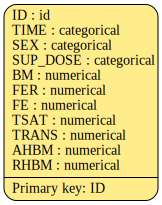

In [10]:
# Generate metadata for the Hbmass dataset

metadata_Hbmass = generate_and_validate_metadata(Hbmass)

# Visualize the metadata
print('Validated metadata:')
metadata_Hbmass.visualize()

# Evaluate synthetic data with the SyntheticDataEvaluator class

In [11]:
# Instantiate an object of the SyntheticDataEvaluator class
evaluator = SyntheticDataEvaluator(Hbmass, Hbmass_synthetic, metadata_Hbmass)
print(evaluator)

Available methods for synthetic data evaluation:
- ks_complement_eval
- tv_complement_eval
- descr_stat_similarity_eval
- corr_similarity_eval
- range_coverage_eval
- cat_coverage_eval
- miss_val_similarity_eval
- new_row_synthesis_eval
- generate_diagnostic_report
- generate_quality_report
- plot_columns
- plot_column_pairs


### KSComplement

In [12]:
evaluator.ks_complement_eval()

,Variable,KSComplement Score
0,AHBM,0.966292
1,BM,0.960674
2,RHBM,0.957865
3,TSAT,0.946629
4,FER,0.941011
5,FE,0.929775
6,TRANS,0.924157
7,mean_ks_score,0.946629


### Descriptive statistics similarity

In [13]:
evaluator.descr_stat_similarity_eval()

,Variable,mean,median,std
0,BM,0.990026,0.986111,0.998054
1,FER,0.977592,0.980093,0.985306
2,FE,0.998725,0.990345,0.997480
3,TSAT,0.994815,1.000000,0.989884
4,TRANS,0.978615,0.967742,0.994833
5,AHBM,0.992606,0.974101,0.999987
6,RHBM,0.999395,0.998601,0.999051


### Correlation similarity

In [16]:
evaluator.corr_similarity_eval()

Choose correlation coefficient:
1. Pearson
2. Spearman


Enter choice (1 or 2):  1


,Column Pair,Correlation Similarity
0,"(AHBM, RHBM)",0.999156
1,"(BM, AHBM)",0.996647
2,"(BM, RHBM)",0.996579
3,"(FER, AHBM)",0.996133
4,"(FER, TRANS)",0.995495
5,"(BM, FER)",0.994128
6,"(FER, FE)",0.992904
7,"(FER, RHBM)",0.992489
8,"(FE, TSAT)",0.980574
9,"(TRANS, AHBM)",0.976768


### Range coverage similarity

In [17]:
evaluator.range_coverage_eval()

,Variable,Range Coverage
0,BM,1.000000
1,TSAT,1.000000
2,TRANS,1.000000
3,AHBM,1.000000
4,RHBM,1.000000
5,FER,0.997685
6,FE,0.995862
7,mean_range_coverage,0.999078


### Missing values similarity

In [18]:
evaluator.miss_val_similarity_eval()

,Variable,Missing Value Similarity
0,mean_missing_value_similarity,None


### New row synthesis

In [19]:
evaluator.new_row_synthesis_eval()

,New Row Synthesis
0,1.0


### Diagnostic Report

In [20]:
diagnostic_report = evaluator.generate_diagnostic_report()

Generating Diagnostic Report. Note: Only 'Data Validity' is supported for visualization by the .get_visualization() method.
Choose detail to view:
1. Data Validity
2. Data Structure


Enter your choice (1 or 2):  1


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 194.22it/s]

Overall Score: 99.95%

Properties:
- Data Validity: 99.9%
- Data Structure: 100.0%

Details for Data Validity:
      Column             Metric     Score
0         ID      KeyUniqueness  1.000000
1       TIME  CategoryAdherence  1.000000
2        SEX  CategoryAdherence  1.000000
3   SUP_DOSE  CategoryAdherence  1.000000
4         BM  BoundaryAdherence  1.000000
5        FER  BoundaryAdherence  1.000000
6         FE  BoundaryAdherence  1.000000
7       TSAT  BoundaryAdherence  1.000000
8      TRANS  BoundaryAdherence  1.000000
9       AHBM  BoundaryAdherence  1.000000
10      RHBM  BoundaryAdherence  0.988764

To visualize 'Data Validity', use: diagnostic_report.get_visualization('Data Validity')


In [21]:
diagnostic_report.get_visualization('Data Validity')

### Quality Report

In [22]:
quality_report = evaluator.generate_quality_report()

Generating Quality Report. You will be able to visualize the selected property after this method's execution.
Choose detail type for Quality Report:
1. Column Shapes
2. Column Pair Trends


Enter your choice (1 or 2):  1


Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 59.42it/s]

Overall Score: 70.84%

Properties:
- Column Shapes: 96.26%
- Column Pair Trends: 45.42%

Details for Column Shapes:
     Column        Metric     Score
0      TIME  TVComplement  1.000000
1       SEX  TVComplement  1.000000
2  SUP_DOSE  TVComplement  1.000000
3        BM  KSComplement  0.960674
4       FER  KSComplement  0.941011
5        FE  KSComplement  0.929775
6      TSAT  KSComplement  0.946629
7     TRANS  KSComplement  0.924157
8      AHBM  KSComplement  0.966292
9      RHBM  KSComplement  0.957865

To visualize 'Column Shapes', use: quality_report.get_visualization('Column Shapes')


In [23]:
quality_report.get_visualization('Column Pair Trends')

### Visualizations

In [24]:
evaluator.plot_columns()

Choose column type for visualization:
1. Numerical
2. Categorical


Enter choice (1 or 2):  1


In [25]:
evaluator.plot_column_pairs()

Choose correlation coefficient:
1. Pearson
2. Spearman


Enter choice (1 or 2):  1


In [26]:
# Below we conduct the same evaluation but only for the numerical columns (categorical columns removed)

# Remove the categorical columns from Hbmass and Hbmass_synthetic

In [27]:
# Categorical columns to be removed
cat_cols_to_remove = ['TIME', 'SEX', 'SUP_DOSE']

# Function to extract categorical columns and save them in a separate dataframe
def cat_cols_remove(input_df, cat_cols):
    cat_cols_df = input_df[cat_cols]
    output_df = input_df.drop(cat_cols, axis=1)
    return cat_cols_df, output_df

In [28]:
# Remove the 3 categorical columns from Hbmass
cat_cols, Hbmass_numerical = cat_cols_remove(Hbmass, cat_cols_to_remove)

In [29]:
# Remove the 3 categorical columns from Hbmass_synthetic
cat_cols_synthetic, Hbmass_synthetic_numerical = cat_cols_remove(Hbmass_synthetic, cat_cols_to_remove)

# Generate metadata for Hbmass numerical

{
    "primary_key": "ID",
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "ID": {
            "sdtype": "id"
        },
        "BM": {
            "sdtype": "numerical"
        },
        "FER": {
            "sdtype": "numerical"
        },
        "FE": {
            "sdtype": "numerical"
        },
        "TSAT": {
            "sdtype": "numerical"
        },
        "TRANS": {
            "sdtype": "numerical"
        },
        "AHBM": {
            "sdtype": "numerical"
        },
        "RHBM": {
            "sdtype": "numerical"
        }
    }
}
Validated metadata:


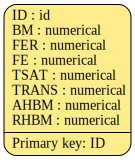

In [33]:
# Generate metadata for Hbmass_numerical

metadata_Hbmass_numerical = generate_and_validate_metadata(Hbmass_numerical)

# Visualize the metadata
print('Validated metadata:')
metadata_Hbmass_numerical.visualize()

# Evaluate synthetic data with the SyntheticDataEvaluator class

In [34]:
# Instantiate an object of the SyntheticDataEvaluator class
evaluator = SyntheticDataEvaluator(Hbmass_numerical, Hbmass_synthetic_numerical, metadata_Hbmass_numerical)
print(evaluator)

Available methods for synthetic data evaluation:
- ks_complement_eval
- tv_complement_eval
- descr_stat_similarity_eval
- corr_similarity_eval
- range_coverage_eval
- cat_coverage_eval
- miss_val_similarity_eval
- new_row_synthesis_eval
- generate_diagnostic_report
- generate_quality_report
- plot_columns
- plot_column_pairs


### KSComplement

In [35]:
evaluator.ks_complement_eval()

,Variable,KSComplement Score
0,AHBM,0.966292
1,BM,0.960674
2,RHBM,0.957865
3,TSAT,0.946629
4,FER,0.941011
5,FE,0.929775
6,TRANS,0.924157
7,mean_ks_score,0.946629


### Descriptive statistics similarity

In [36]:
evaluator.descr_stat_similarity_eval()

,Variable,mean,median,std
0,BM,0.990026,0.986111,0.998054
1,FER,0.977592,0.980093,0.985306
2,FE,0.998725,0.990345,0.997480
3,TSAT,0.994815,1.000000,0.989884
4,TRANS,0.978615,0.967742,0.994833
5,AHBM,0.992606,0.974101,0.999987
6,RHBM,0.999395,0.998601,0.999051


### Correlation similarity

In [37]:
evaluator.corr_similarity_eval()

Choose correlation coefficient:
1. Pearson
2. Spearman


Enter choice (1 or 2):  1


,Column Pair,Correlation Similarity
0,"(AHBM, RHBM)",0.999156
1,"(BM, AHBM)",0.996647
2,"(BM, RHBM)",0.996579
3,"(FER, AHBM)",0.996133
4,"(FER, TRANS)",0.995495
5,"(BM, FER)",0.994128
6,"(FER, FE)",0.992904
7,"(FER, RHBM)",0.992489
8,"(FE, TSAT)",0.980574
9,"(TRANS, AHBM)",0.976768


### Range coverage similarity

In [38]:
evaluator.range_coverage_eval()

,Variable,Range Coverage
0,BM,1.000000
1,TSAT,1.000000
2,TRANS,1.000000
3,AHBM,1.000000
4,RHBM,1.000000
5,FER,0.997685
6,FE,0.995862
7,mean_range_coverage,0.999078


### Missing values similarity

In [39]:
evaluator.miss_val_similarity_eval()

,Variable,Missing Value Similarity
0,mean_missing_value_similarity,None


### New row synthesis

In [40]:
evaluator.new_row_synthesis_eval()

,New Row Synthesis
0,1.0


### Diagnostic Report

In [41]:
diagnostic_report = evaluator.generate_diagnostic_report()

Generating Diagnostic Report. Note: Only 'Data Validity' is supported for visualization by the .get_visualization() method.
Choose detail to view:
1. Data Validity
2. Data Structure


Enter your choice (1 or 2):  1


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 194.22it/s]

Overall Score: 99.93%

Properties:
- Data Validity: 99.86%
- Data Structure: 100.0%

Details for Data Validity:
  Column             Metric     Score
0     ID      KeyUniqueness  1.000000
1     BM  BoundaryAdherence  1.000000
2    FER  BoundaryAdherence  1.000000
3     FE  BoundaryAdherence  1.000000
4   TSAT  BoundaryAdherence  1.000000
5  TRANS  BoundaryAdherence  1.000000
6   AHBM  BoundaryAdherence  1.000000
7   RHBM  BoundaryAdherence  0.988764

To visualize 'Data Validity', use: diagnostic_report.get_visualization('Data Validity')


In [42]:
diagnostic_report.get_visualization('Data Validity')

### Quality Report

In [43]:
quality_report = evaluator.generate_quality_report()

Generating Quality Report. You will be able to visualize the selected property after this method's execution.
Choose detail type for Quality Report:
1. Column Shapes
2. Column Pair Trends


Enter your choice (1 or 2):  1


Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 168.17it/s]

Overall Score: 96.0%

Properties:
- Column Shapes: 94.66%
- Column Pair Trends: 97.34%

Details for Column Shapes:
  Column        Metric     Score
0     BM  KSComplement  0.960674
1    FER  KSComplement  0.941011
2     FE  KSComplement  0.929775
3   TSAT  KSComplement  0.946629
4  TRANS  KSComplement  0.924157
5   AHBM  KSComplement  0.966292
6   RHBM  KSComplement  0.957865

To visualize 'Column Shapes', use: quality_report.get_visualization('Column Shapes')


In [44]:
quality_report.get_visualization('Column Pair Trends')

### Visualizations

In [45]:
evaluator.plot_columns()

Choose column type for visualization:
1. Numerical
2. Categorical


Enter choice (1 or 2):  1


In [46]:
evaluator.plot_column_pairs()

Choose correlation coefficient:
1. Pearson
2. Spearman


Enter choice (1 or 2):  1
